<a href="https://colab.research.google.com/github/pintugiri/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

## Synthetic Dataset for Risk Assessment and Loan Approval Modeling

#### This synthetic dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

1. **Risk Score Regression:** To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

2. **Binary Classification:** To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.
The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

* ApplicationDate: Loan application date
* Age: Applicant's age
* AnnualIncome: Yearly income
* CreditScore: Creditworthiness score
* EmploymentStatus: Job situation
* EducationLevel: Highest education attained
* Experience: Work experience
* LoanAmount: Requested loan size
* LoanDuration: Loan repayment period
* MaritalStatus: Applicant's marital state
* NumberOfDependents: Number of dependents
* HomeOwnershipStatus: Homeownership type
* MonthlyDebtPayments: Monthly debt obligations
* CreditCardUtilizationRate: Credit card usage percentage
* NumberOfOpenCreditLines: Active credit lines
* NumberOfCreditInquiries: Credit checks count
* DebtToIncomeRatio: Debt to income proportion
* BankruptcyHistory: Bankruptcy records
* LoanPurpose: Reason for loan
* PreviousLoanDefaults: Prior loan defaults
* PaymentHistory: Past payment behavior
* LengthOfCreditHistory: Credit history duration
* SavingsAccountBalance: Savings account amount
* CheckingAccountBalance: Checking account funds
* TotalAssets: Total owned assets
* TotalLiabilities: Total owed debts
* MonthlyIncome: Income per month
* UtilityBillsPaymentHistory: Utility payment record
* JobTenure: Job duration
* NetWorth: Total financial worth
* BaseInterestRate: Starting interest rate
* InterestRate: Applied interest rate
* MonthlyLoanPayment: Monthly loan payment
* TotalDebtToIncomeRatio: Total debt against income
* LoanApproved: Loan approval status
* RiskScore: Risk assessment score

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('/content/Loan.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())

    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)

    return df.describe().transpose()

# Call the function
get_df_info(df)


Shape of DataFrame:  (20000, 36)

Columns in DataFrame:  ['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']

Data types of columns:
 ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel          

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


# Data Visualization

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

1. **Distribution of Loan Amounts**

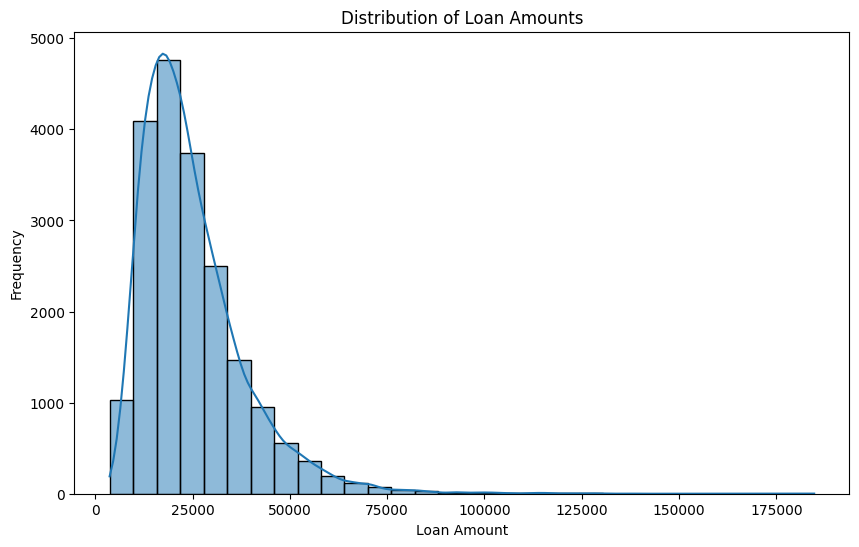

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

2. **Loan Approval Rate by Employment Status**

<ipython-input-6-83100ac584a4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EmploymentStatus', y='LoanApproved', data=df, ci=None)


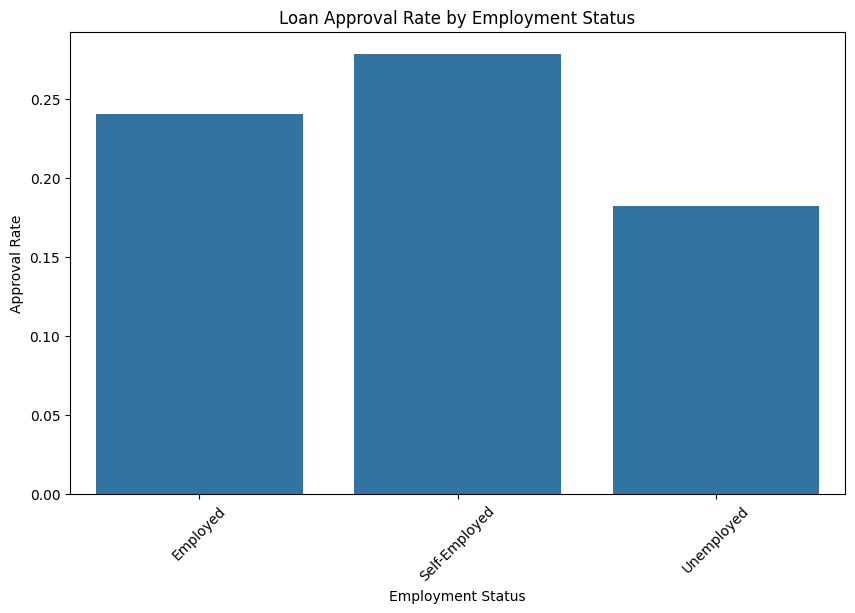

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='EmploymentStatus', y='LoanApproved', data=df, ci=None)
plt.title('Loan Approval Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Approval Rate')
plt.xticks(rotation=45)
plt.show()


3. **Correlation Heatmap**

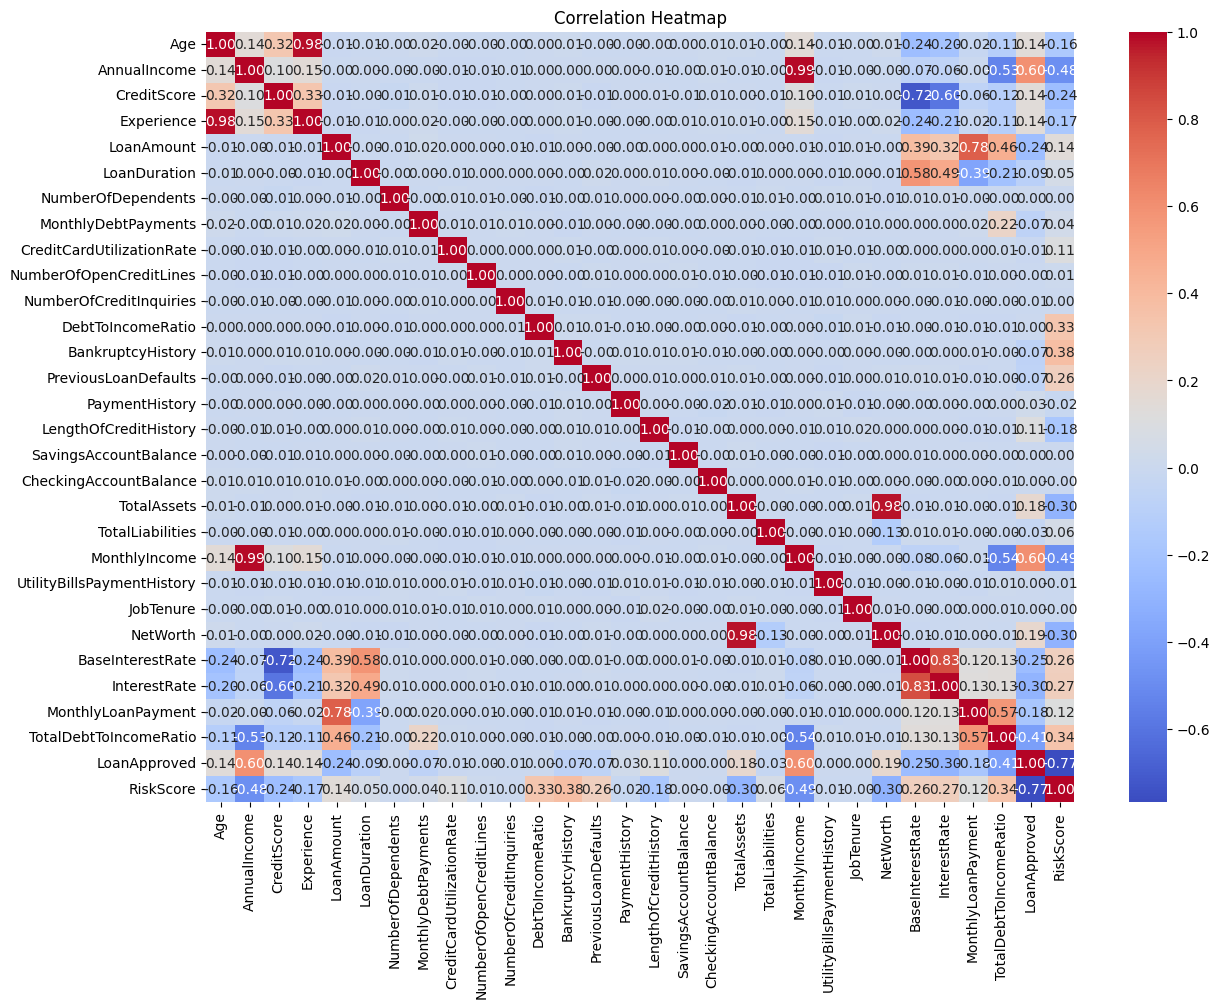

In [7]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

4. **Loan Amount vs. Annual Income**

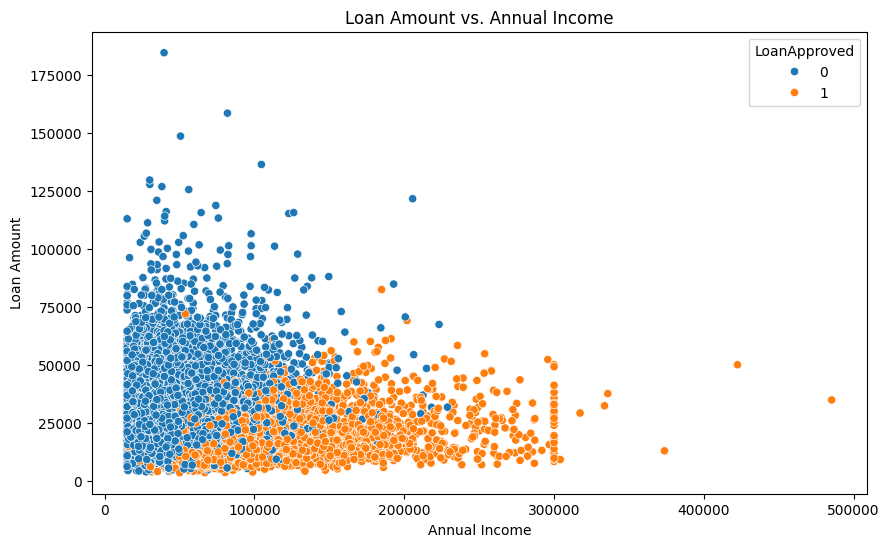

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='LoanAmount', hue='LoanApproved', data=df)
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

5. **Loan Purpose Distribution**

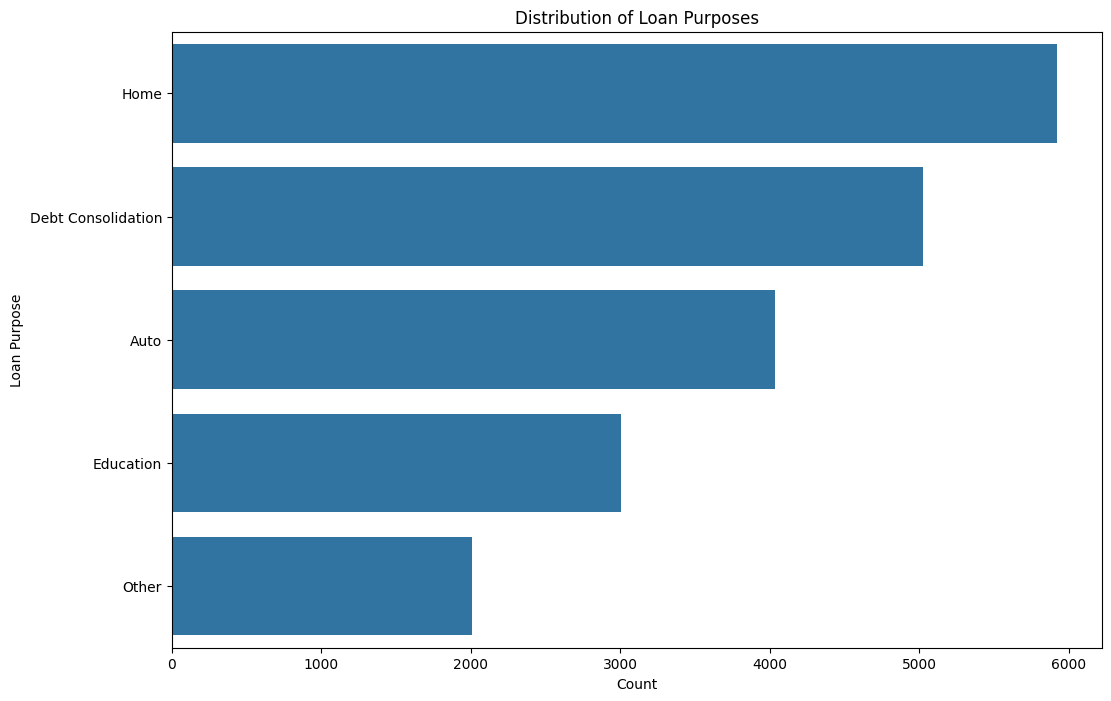

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(y='LoanPurpose', data=df, order=df['LoanPurpose'].value_counts().index)
plt.title('Distribution of Loan Purposes')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.show()

6. **Risk Score Distribution by Loan Approval**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


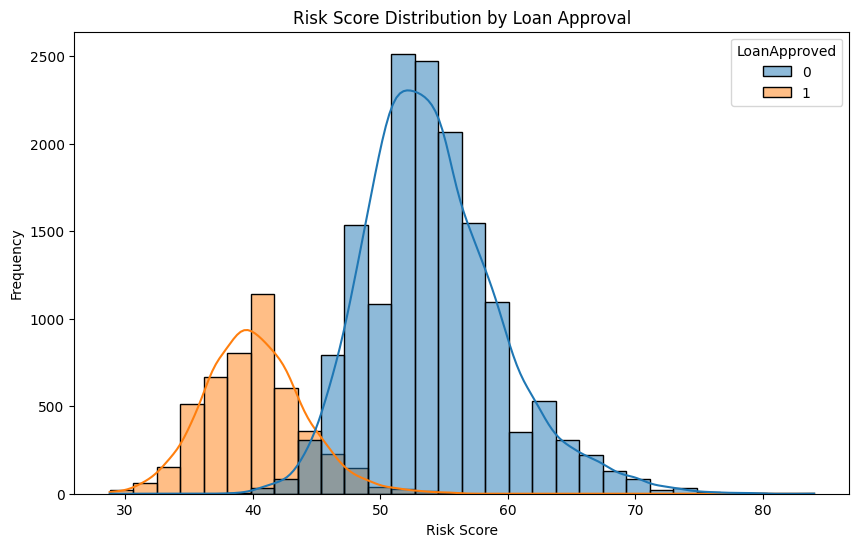

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='RiskScore', hue='LoanApproved', kde=True, bins=30)
plt.title('Risk Score Distribution by Loan Approval')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

7. **Monthly Debt Payments vs. Loan Amount**

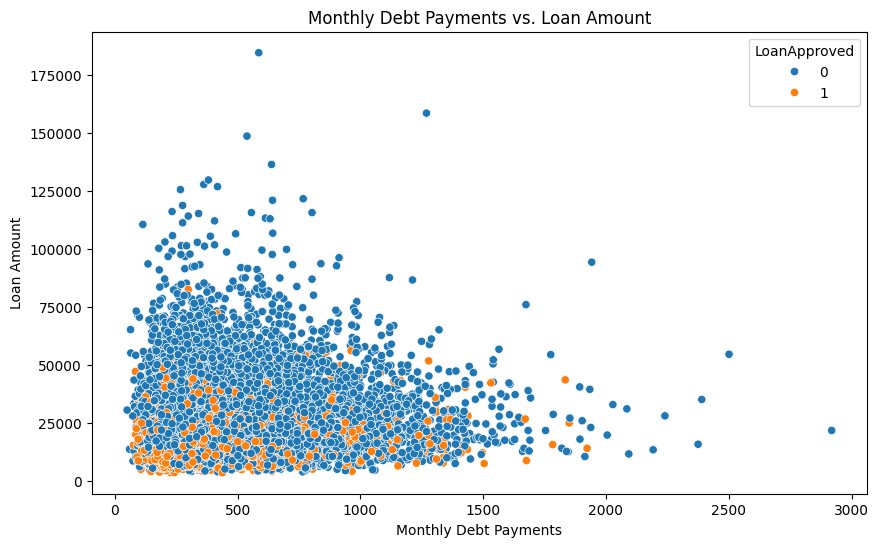

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyDebtPayments', y='LoanAmount', hue='LoanApproved', data=df)
plt.title('Monthly Debt Payments vs. Loan Amount')
plt.xlabel('Monthly Debt Payments')
plt.ylabel('Loan Amount')
plt.show()

8. **Debt to Income Ratio by Loan Approval**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


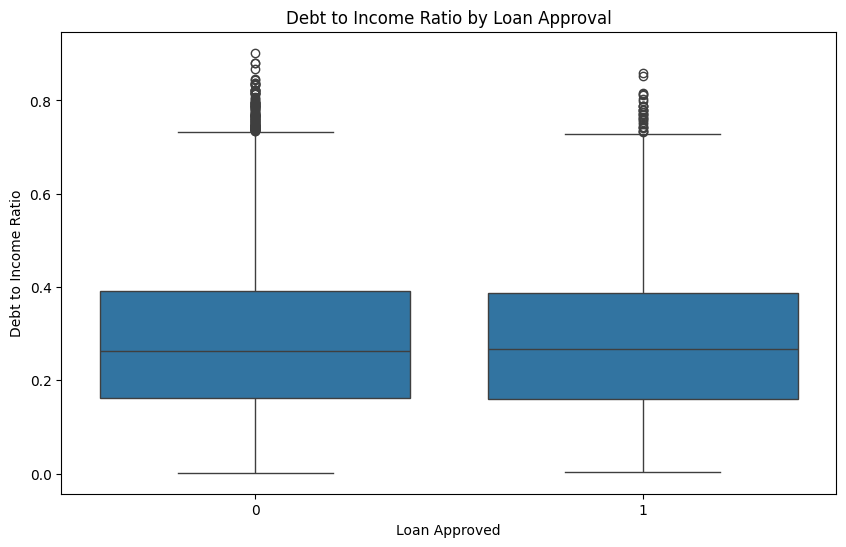

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='LoanApproved', y='DebtToIncomeRatio', data=df)
plt.title('Debt to Income Ratio by Loan Approval')
plt.xlabel('Loan Approved')
plt.ylabel('Debt to Income Ratio')
plt.show()

# Predictive Analysis

### We will drop CreditScore and RiskScore Columns as they are highly correlated to the Target Variable.

In [13]:
# Define the features and the target
X = df.drop(['CreditScore', 'RiskScore','ApplicationDate', 'LoanApproved'], axis=1)
y = df['LoanApproved']

In [14]:
# Handle Categorical variables in X
X = pd.get_dummies(X)

In [16]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00


In [17]:
pip install catboost


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [19]:
def apply_models(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Check for class imbalance
    class_counts = np.bincount(y_train)
    min_samples = np.min(class_counts)
    max_samples = np.max(class_counts)
    imbalance_ratio = min_samples / max_samples

    if imbalance_ratio < 0.5:  # Adjusted threshold
        print(f"Class imbalance detected. Imbalance ratio: {imbalance_ratio:.2f}")
        if imbalance_ratio < 0.1:
            print("Severe imbalance. Applying SMOTE...")
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)
        else:
            print("Moderate imbalance. Consider adjusting class weights in models.")


    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and test data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the models
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs', class_weight='balanced'),
        'SVC': SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
        'DecisionTree': DecisionTreeClassifier(max_depth=5, min_samples_split=2, class_weight='balanced'),
        'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced'),
        'ExtraTrees': ExtraTreesClassifier(n_estimators=100, max_depth=10, class_weight='balanced'),
        'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=0.1),
        'GradientBoost': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
        'LightGBM': LGBMClassifier(n_estimators=100, boosting_type='gbdt'),
        'CatBoost': CatBoostClassifier(verbose=0, iterations=100)
    }

    # Initialize a dictionary to hold the performance of each model
    model_performance = {}

    # Apply each model
    for model_name, model in models.items():
        print(f"\n\033[1mClassification with {model_name}:\033[0m\n{'-' * 30}")

        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Calculate the accuracy and ROC AUC score
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Store the performance in the dictionary
        model_performance[model_name] = (accuracy, roc_auc)

        # Print the accuracy score
        print("\033[1m**Accuracy**:\033[0m\n", accuracy)

        # Print the ROC AUC score
        print("\033[1m**ROC AUC Score**:\033[0m\n", roc_auc)

        # Print the confusion matrix
        print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))

        # Print the classification report
        print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

    # Sort the models based on ROC AUC score and pick the top 3
    top_3_models = sorted(model_performance.items(), key=lambda x: x[1][1], reverse=True)[:3]
    print("\n\033[1mTop 3 Models based on ROC AUC Score:\033[0m\n", top_3_models)

    # Extract the model names and classifiers for the top 3 models
    top_3_model_names = [model[0] for model in top_3_models]
    top_3_classifiers = [models[model_name] for model_name in top_3_model_names]

    # Create a Voting Classifier with the top 3 models
    print("\n\033[1mInitializing Voting Classifier with top 3 models...\033[0m\n")
    voting_clf = VotingClassifier(estimators=list(zip(top_3_model_names, top_3_classifiers)), voting='soft')
    voting_clf.fit(X_train, y_train)
    y_pred = voting_clf.predict(X_test)
    y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    print("\n\033[1m**Voting Classifier Evaluation**:\033[0m\n")
    print("\033[1m**Accuracy**:\033[0m\n", accuracy_score(y_test, y_pred))
    print("\033[1m**ROC AUC Score**:\033[0m\n", roc_auc_score(y_test, y_pred_proba))
    print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

    # Create a Stacking Classifier with the top 3 models
    print("\n\033[1mInitializing Stacking Classifier with top 3 models...\033[0m\n")
    stacking_clf = StackingClassifier(estimators=list(zip(top_3_model_names, top_3_classifiers)))
    stacking_clf.fit(X_train, y_train)
    y_pred = stacking_clf.predict(X_test)
    y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]
    print("\n\033[1m**Stacking Classifier Evaluation**:\033[0m\n")
    print("\033[1m**Accuracy**:\033[0m\n", accuracy_score(y_test, y_pred))
    print("\033[1m**ROC AUC Score**:\033[0m\n", roc_auc_score(y_test, y_pred_proba))
    print("\n\033[1m**Confusion Matrix**:\033[0m\n", confusion_matrix(y_test, y_pred))
    print("\n\033[1m**Classification Report**:\033[0m\n", classification_report(y_test, y_pred))

In [20]:
# Apply the function on X and y
apply_models(X, y)

Class imbalance detected. Imbalance ratio: 0.31
Moderate imbalance. Consider adjusting class weights in models.

Classification with LogisticRegression:
------------------------------
**Accuracy**:
 0.96075
**ROC AUC Score**:
 0.9952691604440898

**Confusion Matrix**:
 [[2852  131]
 [  26  991]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      2983
           1       0.88      0.97      0.93      1017

    accuracy                           0.96      4000
   macro avg       0.94      0.97      0.95      4000
weighted avg       0.96      0.96      0.96      4000


Classification with SVC:
------------------------------
**Accuracy**:
 0.9505
**ROC AUC Score**:
 0.9919662749681826

**Confusion Matrix**:
 [[2831  152]
 [  46  971]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      2983
           1       0.86      0.95      0

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Accuracy**:
 0.892
**ROC AUC Score**:
 0.9538934328286379

**Confusion Matrix**:
 [[2879  104]
 [ 328  689]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2983
           1       0.87      0.68      0.76      1017

    accuracy                           0.89      4000
   macro avg       0.88      0.82      0.85      4000
weighted avg       0.89      0.89      0.89      4000


Classification with GradientBoost:
------------------------------
**Accuracy**:
 0.93775
**ROC AUC Score**:
 0.9835482021853762

**Confusion Matrix**:
 [[2903   80]
 [ 169  848]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2983
           1       0.91      0.83      0.87      1017

    accuracy                           0.94      4000
   macro avg       0.93      0.90      0.92      4000
weighted avg       0.94      0.94      0.94      400

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:52:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Accuracy**:
 0.94975
**ROC AUC Score**:
 0.9906045763752711

**Confusion Matrix**:
 [[2903   80]
 [ 121  896]]

**Classification Report**:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      2983
           1       0.92      0.88      0.90      1017

    accuracy                           0.95      4000
   macro avg       0.94      0.93      0.93      4000
weighted avg       0.95      0.95      0.95      4000


Classification with LightGBM:
------------------------------
[LightGBM] [Info] Number of positive: 3763, number of negative: 12237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4399
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pav